In [32]:
%reload_ext autoreload
%autoreload 2

from datasets import Dataset
import torch
from torch_geometric.utils import subgraph, degree
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [88]:
data = Dataset('cora').load()
data.num_features
data.num_features

8710

In [77]:
data.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [78]:
x = torch.nn.functional.normalize(data.x, p=2, dim=-1)
agg = data.adj_t.matmul(x)
agg

tensor([[0.1072, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1187, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [79]:
deg = data.adj_t.sum(dim=1)
deg.min(), deg.mean(), deg.max()

(tensor(2.), tensor(7.4084), tensor(298.))

In [80]:
idx_min = (deg == deg.min()+1).nonzero()[0].item()
idx_avg = (deg == int(deg.mean())).nonzero()[0].item()
idx_max = (deg == deg.max()).nonzero()[0].item()

idx_min, idx_avg, idx_max

(22, 26, 14810)

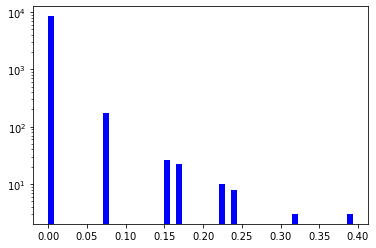

In [81]:
plt.hist(agg[idx_min].numpy(), bins=50, color='b')
plt.yscale('log')

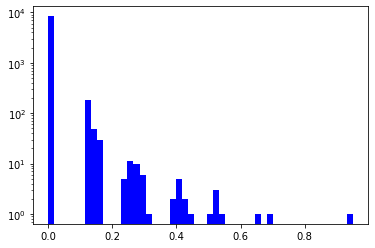

In [82]:
plt.hist(agg[idx_avg].numpy(), bins=50, color='b')
plt.yscale('log')

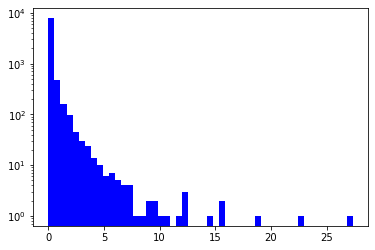

In [83]:
plt.hist(agg[idx_max].numpy(), bins=50, color='b')
plt.yscale('log')

In [84]:
agg_noisy = torch.normal(mean=agg, std=1)
agg_noisy

tensor([[ 0.4304, -0.3574, -0.6412,  ...,  0.0271, -0.5211,  0.1864],
        [-0.2694,  2.4563,  0.3544,  ...,  0.3072,  1.1229,  0.8788],
        [ 0.7383,  0.9242, -1.0799,  ..., -1.6167, -1.2671,  0.5506],
        ...,
        [ 1.7223,  0.3245, -0.7667,  ..., -0.8478,  0.1184,  0.0447],
        [-0.3856, -2.1953, -0.1422,  ..., -1.5196,  0.1204,  0.5863],
        [-0.1890, -0.5210, -0.7800,  ..., -1.0485, -0.3876, -0.7174]])

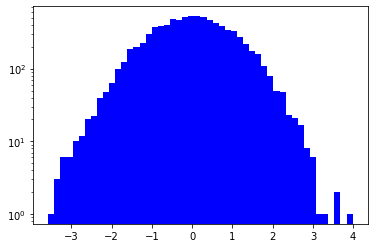

In [85]:
plt.hist(agg_noisy[idx_min].numpy(), bins=50, color='b')
plt.yscale('log')

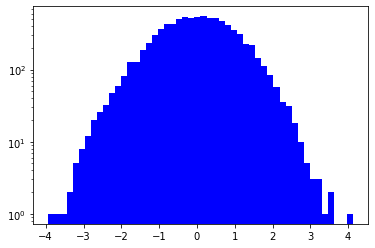

In [86]:
plt.hist(agg_noisy[idx_avg].numpy(), bins=50, color='b')
plt.yscale('log')

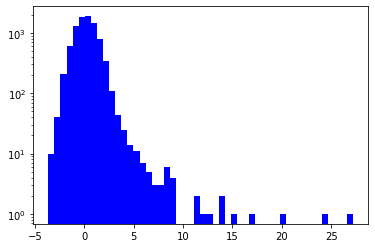

In [87]:
plt.hist(agg_noisy[idx_max].numpy(), bins=50, color='b')
plt.yscale('log')

In [61]:
agg_feature = data.adj_t.matmul(torch.normal(mean=x, std=1))
agg_feature

tensor([[ 1.2584,  1.9566,  1.4098,  ...,  2.0456, -4.6365, -5.1398],
        [-1.7037, -0.0425, -0.8998,  ...,  0.1366,  1.9501,  0.2354],
        [ 1.1183,  1.9120,  0.1034,  ..., -0.4107, -0.8710, -0.9316],
        ...,
        [-0.5052, -1.0593,  2.6781,  ...,  1.9629,  3.7252,  2.1979],
        [ 1.2456, -0.8671, -5.4962,  ...,  0.6749,  2.9515,  0.5998],
        [ 0.3246,  1.0969, -1.8548,  ...,  0.7631, -0.2520,  0.0876]])

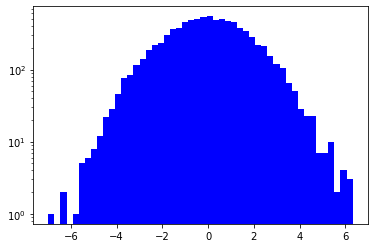

In [62]:
plt.hist(agg_feature[idx_min].numpy(), bins=50, color='b')
plt.yscale('log')

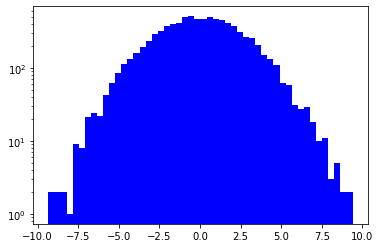

In [63]:
plt.hist(agg_feature[idx_avg].numpy(), bins=50, color='b')
plt.yscale('log')

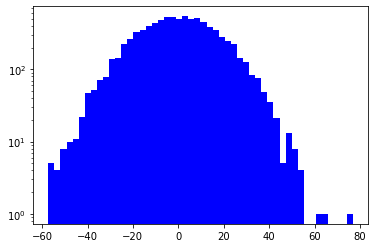

In [64]:
plt.hist(agg_feature[idx_max].numpy(), bins=50, color='b')
plt.yscale('log')